# Desafio de Ciência de Dados do Programa Lighthouse

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

**Seu objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema**. O uso de outras fontes de dados além do dataset é permitido (e encorajado).

Faça uma Análise Exploratória dos Dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!

## Etapa 1: Análise Exploratória dos Dados (EDA)

### 1.1 Compreensão Inicial dos Dados

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Leitura dos dados
url = 'https://drive.google.com/uc?id=122b3O7GoH2pouBcx411M1h0qegZytNpo'
df = pd.read_csv(url)

In [3]:
# Verificando a base de dados
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


#### Dicionário dos Dados:
id – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo  
nome - Representa o nome do anúncio  
host_id - Representa o id do usuário que hospedou o anúncio  
host_name – Contém o nome do usuário que hospedou o anúncio  
bairro_group - Contém o nome do bairro onde o anúncio está localizado  
bairro - Contém o nome da área onde o anúncio está localizado  
latitude - Contém a latitude do local  
longitude - Contém a longitude do local  
room_type – Contém o tipo de espaço de cada anúncio  
price - Contém o preço por noite em dólares listado pelo anfitrião  
minimo_noites - Contém o número mínimo de noites que o usuário deve reservar  
numero_de_reviews - Contém o número de comentários dados a cada listagem  
ultima_review - Contém a data da última revisão dada à listagem  
reviews_por_mes - Contém o número de avaliações fornecidas por mês  
calculado_host_listings_count - Contém a quantidade de listagem por host  
disponibilidade_365 - Contém o número de dias em que o anúncio está disponível para reserva

In [4]:
# Total de linhas e colunas
df.shape

(48894, 16)

In [5]:
# Tipo de dado armazenado em cada coluna
df.dtypes

id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object

In [6]:
# Convertendo o campo ultima_review para datetime
df['ultima_review'] = pd.to_datetime(df['ultima_review'])

In [7]:
df.dtypes

id                                        int64
nome                                     object
host_id                                   int64
host_name                                object
bairro_group                             object
bairro                                   object
latitude                                float64
longitude                               float64
room_type                                object
price                                     int64
minimo_noites                             int64
numero_de_reviews                         int64
ultima_review                    datetime64[ns]
reviews_por_mes                         float64
calculado_host_listings_count             int64
disponibilidade_365                       int64
dtype: object

In [8]:
# Consultando as áreas dos anúncios
df['bairro_group'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [9]:
# Consultando tipos de espaço
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [10]:
# Informações estatísticas do conjunto de dados
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Podemos notar que o preço em dólar por noite apresentou o valor mínimo de 0, o que representa um dado inconsistente que devemos tratar. Isso porque não é possível que a base de anúncios possua algum imóvel cadastrado sem o valor de preço.

Para corrigir essa inconsistência, vamos adotar a estratégia de substituição dos preços iguais a 0 pela média de preço do seu respectivo bairro (bairro_group).

In [11]:
# Consultar anúncios com preço por noite igual a 0
anuncios_preco_zero = df[df['price'] == 0]
anuncios_preco_zero.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
23160,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25432,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25633,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25752,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25777,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73


In [12]:
# Consultando número de anúncios com preço 0
num_anuncios_preco_zero = len(anuncios_preco_zero)
print(num_anuncios_preco_zero)

11


In [13]:
# Calculando a média de preços de cada bairro
media_precos_por_bairro = df[df['price'] != 0].groupby('bairro_group')['price'].mean().astype(int)
print(media_precos_por_bairro)

bairro_group
Bronx             87
Brooklyn         124
Manhattan        196
Queens            99
Staten Island    114
Name: price, dtype: int32


In [14]:
# Substituindo os preços iguais a 0 pela média do respectivo bairro
for bairro in media_precos_por_bairro.index:
    df.loc[(df['price'] == 0) & (df['bairro_group'] == bairro), 'price'] = media_precos_por_bairro[bairro]

In [15]:
# Consultando novas métricas estatísticas do dataset
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.749376,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.146278,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 1.2 Limpeza e Tratamento dos Dados:

#### 1.2.1 Tratamento de Valores Duplicados e Nulos

In [16]:
# Verificando valores duplicados
duplicados = df.duplicated()
duplicados.sum()

0

In [17]:
# Consultando campos com valores nulos
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Considerando que temos um dataset com 48.894 dados e que apenas 16 anúncios não possuem a descrição de nome, vamos seguir com a exclusão desses dados, pois representa uma perda pouco significativa para a análise. 

Já com relação aos 21 dados sem host_name, vamos apenas atualizar esse campo com o valor 'Unknown' do tipo object, pois se trata de um campo com baixa relevância para a análise que estamos conduzindo.

No que se refere aos campos ultima_review e reviews_por_mes, a grande quantidade de dados ausentes sugere que esses imóveis podem nunca ter sido alugados ou revisados. Portanto, adotaremos como estratégia subtituir por zero os valores nulos do campo reviews_por_mes e substituir pela data mais antiga de review os valores nulos do campo ultima_review.

In [18]:
# Removendo os dados sem nome
df.dropna(subset=['nome'], inplace=True)

In [19]:
# Substituindo valores nulos de host_name por 'Unknown'
df['host_name'].fillna('Unknown', inplace=True)

In [20]:
# Substituindo valores nulos de reviews_por_mes por 0.0
reviews_por_mes: df['reviews_por_mes'].fillna(0, inplace=True)

In [21]:
menor_data = df['ultima_review'].min()
print(menor_data)

2011-03-28 00:00:00


In [22]:
ultima_review: df['ultima_review'].fillna(df['ultima_review'].min(), inplace=True)

In [23]:
df.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [24]:
df.shape

(48878, 16)

In [25]:
# Resetando o index do dataset
df.reset_index(drop=True, inplace=True)

#### 1.2.2 Detecção e Tratamento de Outliers

Para a detecção e tratamento de outliers no conjunto de dados, foi adotado o método do Intervalo Interquartil (IQR, do inglês Interquartile Range), que é uma técnica comumente usada para identificar e tratar valores atípicos em um conjunto de dados. O IQR mede a dispersão estatística ao dividir um conjunto de dados em quartis, por meio da diferença entre o terceiro (Q3) e o primeiro quartil (Q1).

Assim, primeiramente, vamos analisar por meio de histogramas a distribuição das variáveis numéricas do nosso conjunto de dados para validar a possível presença de outliers.

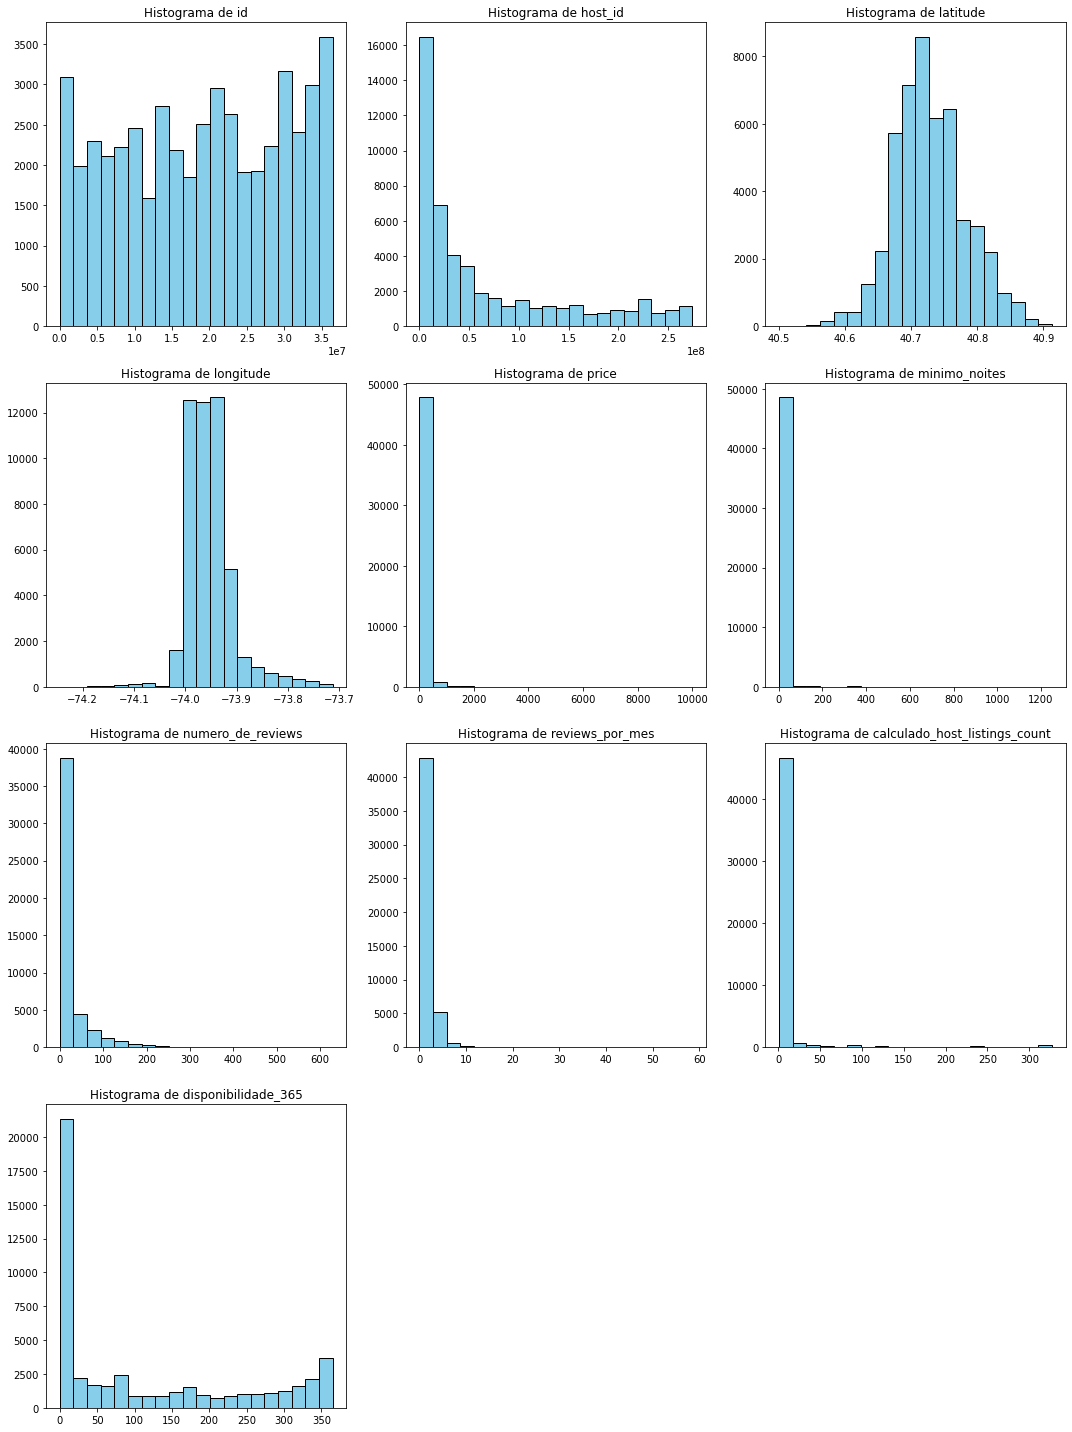

In [26]:
# Identificando colunas numéricas
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Número de colunas numéricas
num_colunas = len(colunas_numericas)

# Definindo o número de colunas e linhas para os subplots
num_linhas = int(np.ceil(num_colunas / 3))  # Por exemplo, até 3 histogramas por linha
num_cols = min(num_colunas, 3)  # Não mais do que 3 colunas

# Criando subplots
fig, axs = plt.subplots(num_linhas, num_cols, figsize=(5 * num_cols, 5 * num_linhas))

# Ajustando axs para ser um array bidimensional
if num_linhas * num_cols > 1:
    axs = axs.ravel()
else:
    axs = [axs]

# Plotando os histogramas
for i, col in enumerate(colunas_numericas):
    axs[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histograma de {col}')

# Desativando subplots extras
for j in range(i + 1, num_linhas * num_cols):
    axs[j].axis('off')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

Com base nos histogramas acima, verificamos que de fato existem valores discrepantes no dataset, em especial nas colunas 'price' e 'minimo-noites'. Esses outliers distorcerão os modelos a serem construídos posteriormente caso não sejam tratados. Portanto, levaremos em consideração apenas os valores de 'price' e 'minimo-noites' que estejam dentro do intervalo definido pelo método IQR.

Para seguir com o tratamento dos outliers, vamos calcular o IQR para cada uma das variáveis a serem limpas, bem como definiremos seus respectivos limites superior e inferior para remover os outliers do dataset.

**Nota:** As variáveis numero_de_reviews, calculado_host_listings_count e disponibilidade_365 também podem conter outliers, mas não vamos nos preocupar com elas agora.

Primeiramente, vamos dar uma olhada novamente nas estatíscas da variável 'price':

In [27]:
with pd.option_context('float_format', '{:f}'.format): print(df["price"].describe())

count   48878.000000
mean      152.751054
std       240.178911
min        10.000000
25%        69.000000
50%       106.000000
75%       175.000000
max     10000.000000
Name: price, dtype: float64


Como os valores de preço por noite variam de 10 a 10.000 com um valor médio de apenas 152,75, temos um indício de que podem haver outliers em nosso dataset. Portanto, vamos aplicar o método IQR na coluna 'price'.

In [34]:
# Identificando outliers da variável 'price'

# Calculando Q1 e Q3
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)

# Calculando IQR
IQR_price = Q3_price - Q1_price
print(f'Primeiro Quartil (Q1): {Q1_price}\nTerceiro Quartil (Q3): {Q3_price}\nIntervalo Interquartil (IQR): {IQR_price}')

# Definindo os limites
inf_price = Q1_price - 1.5 * IQR_price
sup_price = Q3_price + 1.5 * IQR_price
print(f'\nLimite inferior de price: {inf_price}\nLimite superior de price: {sup_price}')

Primeiro Quartil (Q1): 69.0
Terceiro Quartil (Q3): 175.0
Intervalo Interquartil (IQR): 106.0

Limite inferior de price: -90.0
Limite superior de price: 334.0


Nota-se que o limite inferior para 'price' é negativo, o que indica que não temos outliers na parte inferior da distribuição dos dados de preço. Logo, precisamos apenas garantir que os valores de preço estejam dentro do limite superior para que os dados mantenham a sua representatividade. Portanto, vamos verificar a quantidade de anúncios que devemos excluir do dataset.

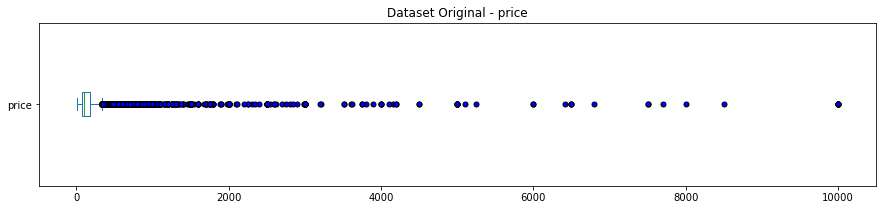

O dataset possui 48878 anúncios
2971 entradas acima de 334.0
que representam 6.08% do dataset


In [43]:
# Verificando o dataset original para 'price'
fig, ax = plt.subplots(figsize=(15,3))
flierprops = dict(marker='o', markerfacecolor='blue', markersize=5,
                  linestyle='none', markeredgecolor='black')
df.price.plot(kind='box', vert=False, flierprops=flierprops)
ax.set_title('Dataset Original - price')
plt.show()

print('O dataset possui {} anúncios'.format(df.shape[0]))
print('{} entradas acima de 334.0'.format(len(df[df.price > 334])))
print('que representam {:.2f}% do dataset'.format((len(df[df.price > 334]) / df.shape[0])*100))

In [36]:
# Identificando outliers da variável 'minimo_noites'

# Calculando Q1 e Q3
Q1_noites = df['minimo_noites'].quantile(0.25)
Q3_noites = df['minimo_noites'].quantile(0.75)

# Calculando IQR
IQR_noites = Q3_noites - Q1_noites
print(f'Primeiro Quartil (Q1): {Q1_noites}\nTerceiro Quartil (Q3): {Q3_noites}\nIntervalo Interquartil (IQR): {IQR_noites}')

# Definindo os limites
inf_noites = Q1_noites - 1.5 * IQR_noites
sup_noites = Q3_noites + 1.5 * IQR_noites
print(f'\nLimite inferior de minimo_noites: {inf_noites}\nLimite superior de minimo_noites: {sup_noites}')

Primeiro Quartil (Q1): 1.0
Terceiro Quartil (Q3): 5.0
Intervalo Interquartil (IQR): 4.0

Limite inferior de minimo_noites: -5.0
Limite superior de minimo_noites: 11.0


Podemos notar novamente que o limite inferior para 'minimo_noites' é negativo, o que indica que não temos outliers na parte inferior da distribuição dos dias mínimos para reserva. Assim, precisamos apenas garantir que os valores de 'minimo_noites' estejam dentro do limite superior para que os dados mantenham a sua representatividade. Portanto, vamos verificar a quantidade de anúncios que devemos excluir do dataset.

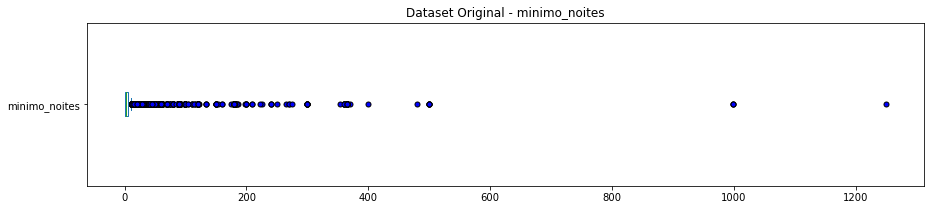

O dataset possui 48878 anúncios
6606 entradas acima de 11.0
que representam 13.52% do dataset


In [42]:
# Verificando o dataset original para 'minimo_noites'
fig, ax = plt.subplots(figsize=(15,3))
flierprops = dict(marker='o', markerfacecolor='blue', markersize=5,
                  linestyle='none', markeredgecolor='black')
df.minimo_noites.plot(kind='box', vert=False, flierprops=flierprops)
ax.set_title('Dataset Original - minimo_noites')
plt.show()

print('O dataset possui {} anúncios'.format(df.shape[0]))
print('{} entradas acima de 11.0'.format(len(df[df.minimo_noites > 11])))
print('que representam {:.2f}% do dataset'.format((len(df[df.minimo_noites > 11]) / df.shape[0])*100))

Agora que já sabemos quais valores discrepantes devemos remover do dataset, podemos prosseguir com a exclusão adequada desses dados.

In [44]:
# Deletando os outliers do dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 334].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimo_noites > 11].index, axis=0, inplace=True)

print('Shape antes da remoção de outliers: ', df.shape)
print('Shape após a remoção de outliers: ', df_clean.shape)

Shape antes da remoção de outliers:  (48878, 16)
Shape após a remoção de outliers:  (39722, 16)


Ao todo, foram removidos do dataset **9.156 anúncios** com valores discrepantes de preço por noite e dias mínimos para reserva, o que representa apenas **18,7%** do conjunto de dados original. 

Agora vamos verificar como ficou a distribuição das variáveis após essa modificação do dataset.

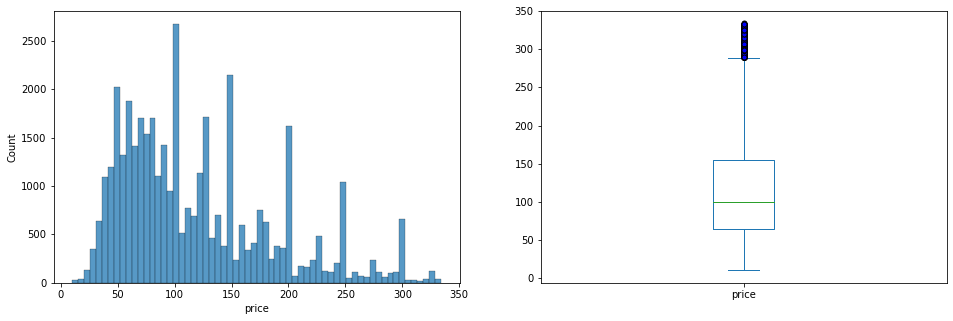

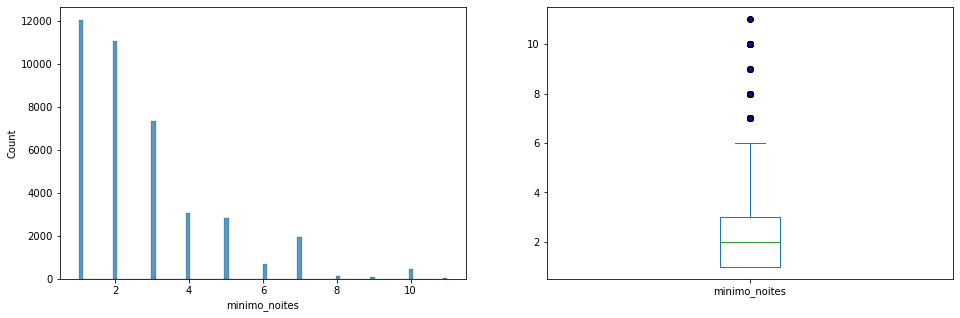

In [41]:
# Gerando o gráfico de distribuição boxplot para checar a distribuição de 'price'

# Configurações para os outliers
flierprops = dict(marker='o', markerfacecolor='blue', markersize=5,
                  linestyle='none', markeredgecolor='black')

plt.subplot(121)
sns.histplot(df_clean['price']);

plt.subplot(122)
df_clean['price'].plot.box(figsize=(16,5), flierprops=flierprops)
plt.show()

# Gerando o gráfico de distribuição boxplot para checar a distribuição de 'minimo_noites'
plt.subplot(121)
sns.histplot(df_clean['minimo_noites']);

plt.subplot(122)
df_clean['minimo_noites'].plot.box(figsize=(16,5), flierprops=flierprops)
plt.show()

Para garantirmos que não estamos lidando com outliers que vão prejudicar nossa análise, vamos checar os histogramas e as estatísticas novamente para o dataframe limpo.

In [45]:
df_clean.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,3.972200e+04,3.972200e+04,39722.000000,39722.000000,39722.000000,39722.000000,39722.000000,39722.000000,39722.000000,39722.000000
mean,1.883771e+07,6.622844e+07,40.727569,-73.949144,119.025024,2.696264,26.386864,1.232591,3.073637,97.172902
std,1.084287e+07,7.751364e+07,0.056291,0.047713,67.158151,1.863541,47.481743,1.683659,19.747797,124.352255
min,2.595000e+03,2.571000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.417340e+06,7.823258e+06,40.688070,-73.981037,65.000000,1.000000,1.000000,0.070000,1.000000,0.000000
50%,1.947591e+07,3.073296e+07,40.720080,-73.953320,100.000000,2.000000,7.000000,0.510000,1.000000,25.000000
75%,2.861596e+07,1.036670e+08,40.763260,-73.932175,154.750000,3.000000,29.000000,1.890000,2.000000,179.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,334.000000,11.000000,629.000000,58.500000,327.000000,365.000000


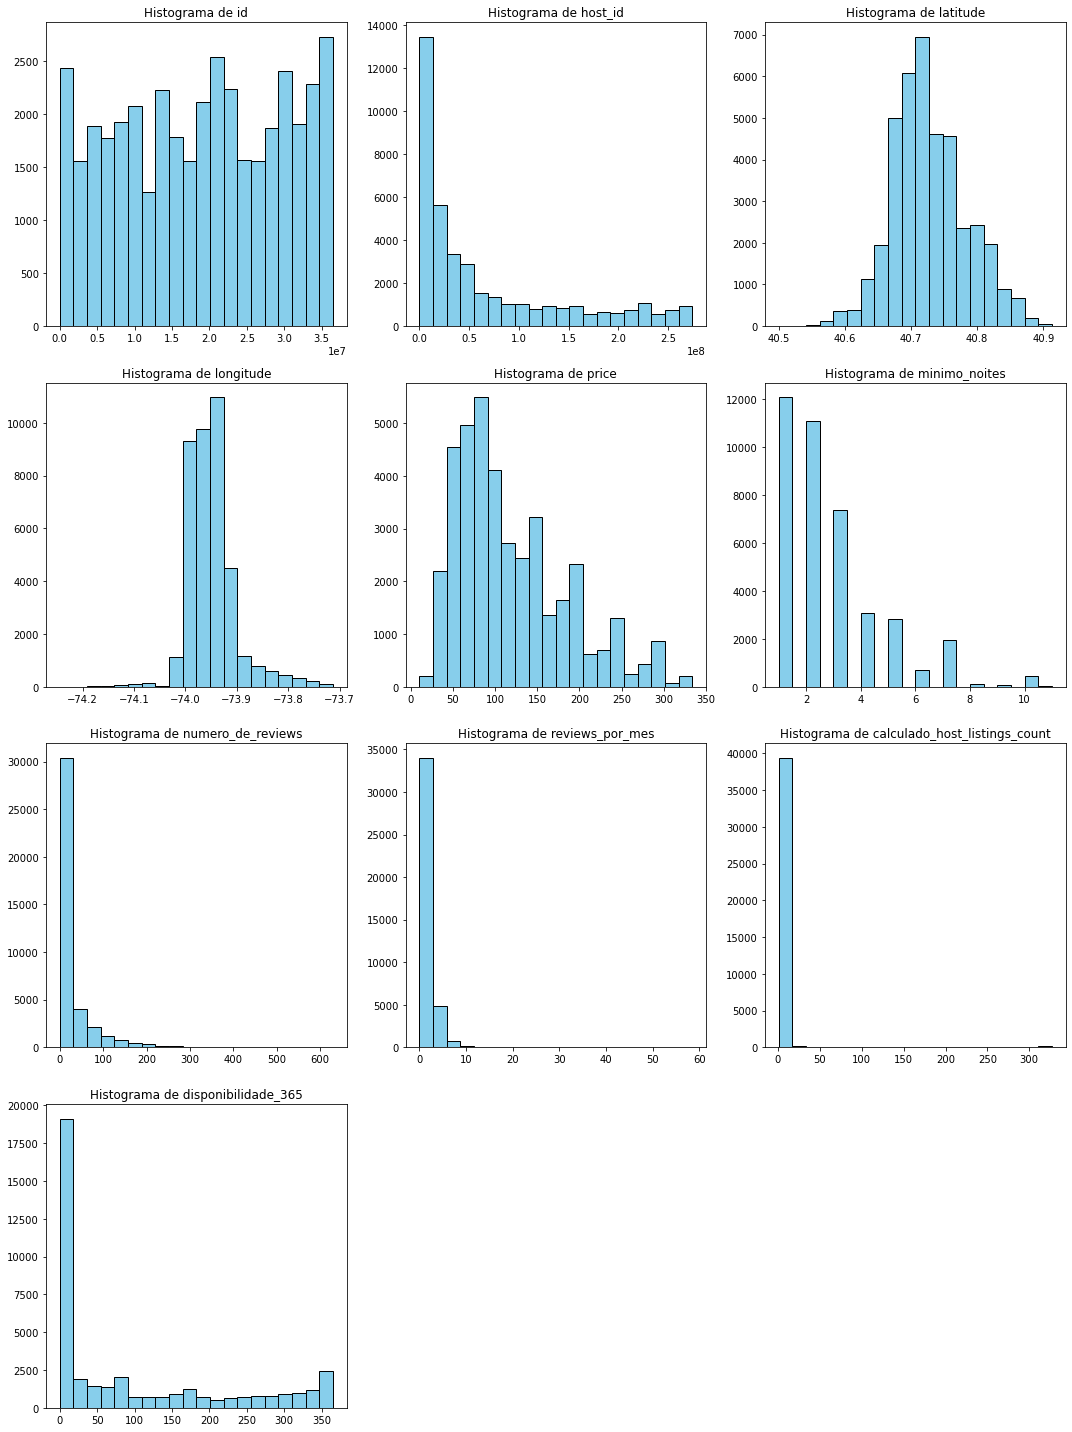

In [46]:
# Identificando colunas numéricas
colunas_numericas = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Número de colunas numéricas
num_colunas = len(colunas_numericas)

# Definindo o número de colunas e linhas para os subplots
num_linhas = int(np.ceil(num_colunas / 3))  # Por exemplo, até 3 histogramas por linha
num_cols = min(num_colunas, 3)  # Não mais do que 3 colunas

# Criando subplots
fig, axs = plt.subplots(num_linhas, num_cols, figsize=(5 * num_cols, 5 * num_linhas))

# Ajustando axs para ser um array bidimensional
if num_linhas * num_cols > 1:
    axs = axs.ravel()
else:
    axs = [axs]

# Plotando os histogramas
for i, col in enumerate(colunas_numericas):
    axs[i].hist(df_clean[col], bins=20, color='skyblue', edgecolor='black')
    axs[i].set_title(f'Histograma de {col}')

# Desativando subplots extras
for j in range(i + 1, num_linhas * num_cols):
    axs[j].axis('off')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

A partir desses dados, podemos inferir algumas informações importantes para nossa análise:
- A mediana da variável price foi pouco afetada pela limpeza dos outliers, mostrando mais uma vez a robustez desse atributo como solução para dados ausentes;
- A média da variável price foi reduzida drasticamente, enfatizando a sensibilidade desse atributo em relação aos outliers.

### 1.4 Análise de Rentabilidade dos Bairros

In [47]:
# Realculando a média de preços de cada bairro
media_precos_bairro_atual = df_clean.groupby('bairro_group')['price'].mean().astype(int).sort_values(ascending=False)
print(media_precos_bairro_atual)

bairro_group
Manhattan        143
Brooklyn         107
Queens            91
Staten Island     89
Bronx             78
Name: price, dtype: int32


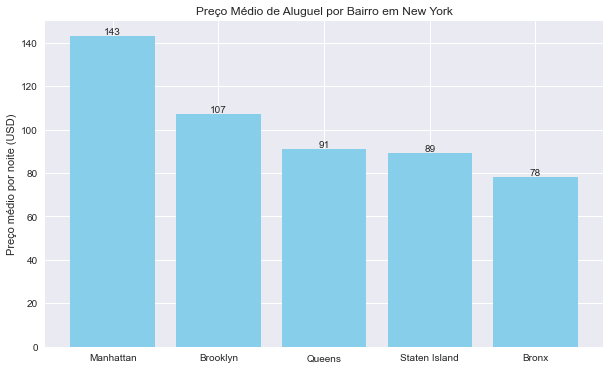

In [48]:
# Plotando o gráfico da média de preços por bairro

# Configurar o estilo e tamanho do gráfico
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
                    
# Criar um gráfico de barras
barras = plt.bar(media_precos_bairro_atual.index, media_precos_bairro_atual.values, color='skyblue')

# Adicionar os valores em cada barra
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Adicionar títulos e rótulos
plt.title('Preço Médio de Aluguel por Bairro em New York')
plt.ylabel('Preço médio por noite (USD)')

# Mostrar o gráfico                    
plt.show()

Com base nos dados acima, podemos notar que o bairro Manhattan apresenta os maiores preços médios para aluguéis de temporada na região de New York, em contrapartida a média de preço por noite no Bronx foi a menor. 

Para termos uma visão melhor de qual região seria mais rentável, vamos fazer uma estimativa de faturamento mínimo com base nas quantidades de reviews e no número mínimo de dias para reserva.

Vale ressaltar que essa métrica de faturamento mínimo é uma estimativa e assume que cada review corresponde a uma reserva única que atende ao número mínimo de noites. Na prática, pode haver variações, como reservas que excedem o número mínimo de noites ou reservas que não geraram reviews.

In [58]:
# Calcular o faturamento mínimo de cada anúncio
df_clean['faturamento_minimo'] = df_clean['numero_de_reviews'] * df_clean['minimo_noites'] * df_clean['price']

In [59]:
# Calcular a média de faturamento mínimo de cada bairro
media_faturamento_bairro = df_clean.groupby('bairro_group')['faturamento_minimo'].mean().astype(int).sort_values(ascending=False)
print(media_faturamento_bairro)

bairro_group
Manhattan        8341
Brooklyn         7194
Staten Island    5931
Queens           4922
Bronx            4314
Name: faturamento_minimo, dtype: int32


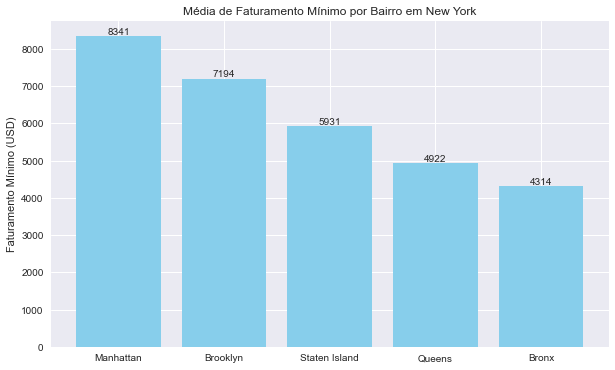

In [52]:
# Plotando o gráfico da média de faturamento mínimo por bairro

# Configurar o estilo e tamanho do gráfico
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
                    
# Criar um gráfico de barras
barras_faturamento = plt.bar(media_faturamento_bairro.index, media_faturamento_bairro.values, color='skyblue')

# Adicionar os valores em cada barra
for barra in barras_faturamento:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Adicionar títulos e rótulos
plt.title('Média de Faturamento Mínimo por Bairro em New York')
plt.ylabel('Faturamento Mínimo (USD)')

# Mostrar o gráfico                    
plt.show()

In [53]:
# Agrupar por bairro e contar o número de anúncios em cada um
num_anuncios_por_bairro = df_clean.groupby('bairro_group')['id'].count().sort_values(ascending=False)
print(num_anuncios_por_bairro)

bairro_group
Brooklyn         17341
Manhattan        16001
Queens            5027
Bronx             1009
Staten Island      344
Name: id, dtype: int64


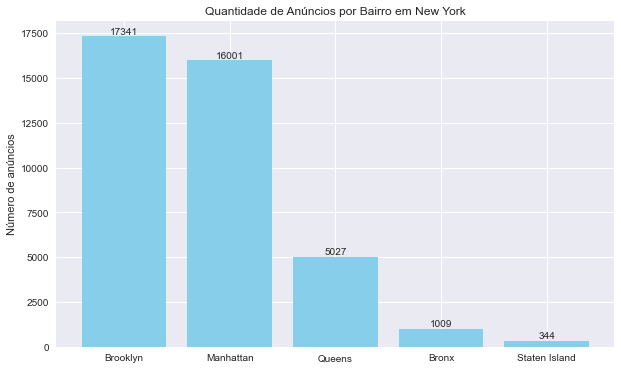

In [54]:
# Plotando o gráfico do número de anúncios por bairro

# Configurar o estilo e tamanho do gráfico
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
                    
# Criar um gráfico de barras
barras_anuncios_bairro = plt.bar(num_anuncios_por_bairro.index, num_anuncios_por_bairro.values, color='skyblue')

# Adicionar os valores em cada barra
for barra in barras_anuncios_bairro:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Adicionar títulos e rótulos
plt.title('Quantidade de Anúncios por Bairro em New York')
plt.ylabel('Número de anúncios')

# Mostrar o gráfico                    
plt.show()

Com essa estimativa, podemos validar que Manhattan é de fato a região com maior rentabilidade, apresentando um faturamento mínimo de aproximadamente US$8.341. Portanto, Manhattan seria o bairro mais indicado para investir na compra de imóveis com o intuito de alugar na plataforma, apesar de ocupar o segundo lugar como região com maior número de imóveis sendo alugados, o que é compensado pela diária por noite dos aluguéis nessa região.

Agora vamos verificar qual área dentro de Manhattan seria mais indicada para a compra de um imóvel.

In [55]:
# Filtrar os anúncios em Manhattan
manhattan_anuncios = df_clean[df_clean['bairro_group'] == 'Manhattan']

In [56]:
# Agrupar por área e somar o faturamento mínimo
faturamento_por_area = manhattan_anuncios.groupby('bairro')['faturamento_minimo'].sum().sort_values(ascending=False)
print(faturamento_por_area)

bairro
Harlem                 18712672
Hell's Kitchen         14649018
East Village           14468812
Upper West Side        10321030
Upper East Side         9778174
East Harlem             9129360
Lower East Side         7941317
Chelsea                 7642106
Midtown                 6829745
West Village            6115314
Washington Heights      2968711
Chinatown               2929556
Gramercy                2579748
Greenwich Village       2462185
SoHo                    2433319
Financial District      2412120
Nolita                  2207813
Kips Bay                1899336
Murray Hill             1346307
Theater District        1180568
Morningside Heights     1179084
Inwood                   963358
Little Italy             761459
Two Bridges              687367
Tribeca                  477149
Flatiron District        398240
Civic Center             291954
NoHo                     242200
Roosevelt Island         239738
Battery Park City        118594
Stuyvesant Town           77708
M

In [57]:
# Contar o número de anúncios em cada área de Manhattan
num_anuncios_por_area = manhattan_anuncios.groupby('bairro')['id'].count().sort_values(ascending=False)
print(num_anuncios_por_area)

bairro
Harlem                 2297
East Village           1522
Hell's Kitchen         1426
Upper West Side        1383
Upper East Side        1280
East Harlem             979
Midtown                 811
Washington Heights      808
Chelsea                 766
Lower East Side         746
West Village            555
Financial District      438
Chinatown               306
Morningside Heights     298
Kips Bay                297
Greenwich Village       293
Gramercy                256
SoHo                    243
Murray Hill             226
Inwood                  225
Nolita                  196
Theater District        150
Little Italy             77
Tribeca                  70
Roosevelt Island         69
Two Bridges              69
NoHo                     50
Flatiron District        45
Battery Park City        44
Civic Center             38
Stuyvesant Town          26
Marble Hill              12
Name: id, dtype: int64


Assim, as cinco regiões de Manhattan mais promissoras em termos de rentabilidade para aluguel na plataforma seriam Harlem, East Village, Hell's Kitchen, Upper West Side e Upper East Side.

*Lembrando que essa é apenas uma estimativa e devemos ter em mente que a rentabilidade real dos imóveis pode apresentar variações, uma vez que estamos trabalhando com valores mínimos de dias para reserva.*

### 1.5 Análise dos Tipos de Espaço

In [60]:
num_tipos_anuncios = df_clean.groupby('room_type')['id'].count().sort_values(ascending=False)
print(num_tipos_anuncios)

room_type
Private room       19857
Entire home/apt    18876
Shared room          989
Name: id, dtype: int64


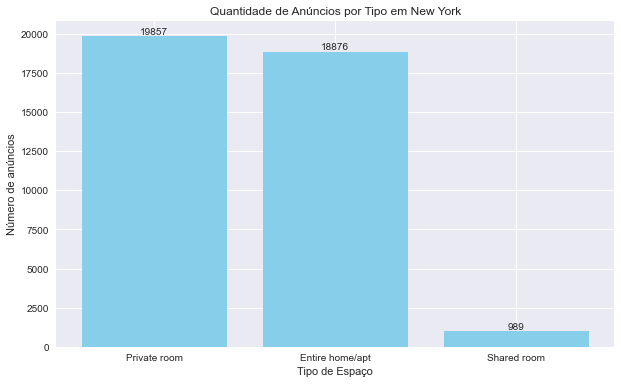

In [61]:
# Plotando o gráfico do número de anúncios por tipo de espaço
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
barras_anuncios_tipo = plt.bar(num_tipos_anuncios.index, num_tipos_anuncios.values, color='skyblue')

for barra in barras_anuncios_tipo:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.title('Quantidade de Anúncios por Tipo em New York')
plt.xlabel('Tipo de Espaço')  
plt.ylabel('Número de anúncios')             
plt.show()

In [62]:
# Consultar o faturamento por tipo de espaço
faturamento_tipos_anuncios = df_clean.groupby('room_type')['faturamento_minimo'].count().sort_values(ascending=False)
print(faturamento_tipos_anuncios)

room_type
Private room       19857
Entire home/apt    18876
Shared room          989
Name: faturamento_minimo, dtype: int64


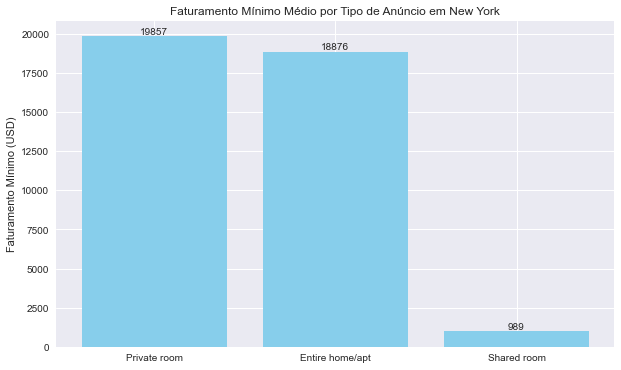

In [63]:
# Plotando o gráfico do faturamento mínimo por tipo de espaço
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
barras_faturamento_tipos = plt.bar(faturamento_tipos_anuncios.index, faturamento_tipos_anuncios.values, color='skyblue')

for barra in barras_faturamento_tipos:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.title('Faturamento Mínimo Médio por Tipo de Anúncio em New York')
plt.ylabel('Faturamento Mínimo (USD)')             
plt.show()

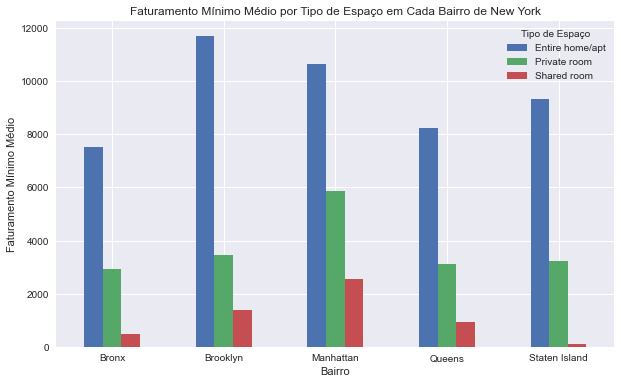

In [64]:
# Faturamento mínimo médio por tipo e por bairro

# Agrupar os dados
grouped_data = df_clean.groupby(['bairro_group', 'room_type']).agg({'faturamento_minimo':'mean'}).reset_index()

# Pivotear os dados para o formato correto para plotagem
pivot_data = grouped_data.pivot(index='bairro_group', columns='room_type', values='faturamento_minimo')

# Plotar o gráfico de barras agrupadas
pivot_data.plot(kind='bar', figsize=(10, 6))

# Adicionando detalhes ao gráfico
plt.title('Faturamento Mínimo Médio por Tipo de Espaço em Cada Bairro de New York')
plt.xlabel('Bairro')
plt.ylabel('Faturamento Mínimo Médio')
plt.xticks(rotation=360)
plt.legend(title='Tipo de Espaço')
plt.show()


In [65]:
print(pivot_data.astype(int).sort_values(ascending=False, by='Entire home/apt'))

room_type      Entire home/apt  Private room  Shared room
bairro_group                                             
Brooklyn                 11691          3441         1392
Manhattan                10643          5881         2542
Staten Island             9329          3227          118
Queens                    8222          3118          915
Bronx                     7533          2918          463


### 1.6 Análise de Correlação

Nesta etapa, faremos a análise de correlação entre as variáveis para validar o seu grau de influência sobre a variável target 'price'. Para tanto, será utilizado o método de Pearson, projetado para lidar com relações lineares.

Para prosseguir com a análise,  será necessário primeiramente converter as variáveis categóricas relevantes para a análise em variáveis numéricas. Nesse caso, faremos a conversão das variáveis *'bairro_group'* e *'room_type'*, que possuem 5 e 3 categorias distintas, respectivamente.

In [66]:
# Convertendo variáveis categóricas em numéricas
df_corr = df_clean.copy()
df_corr = pd.get_dummies(df_corr, columns=['bairro_group'])
df_corr = pd.get_dummies(df_corr, columns=['room_type'])

Agora que as variáveis categóricas foram convertidas para valores numéricos, podemos iniciar a validação de correlação entre as variáveis.

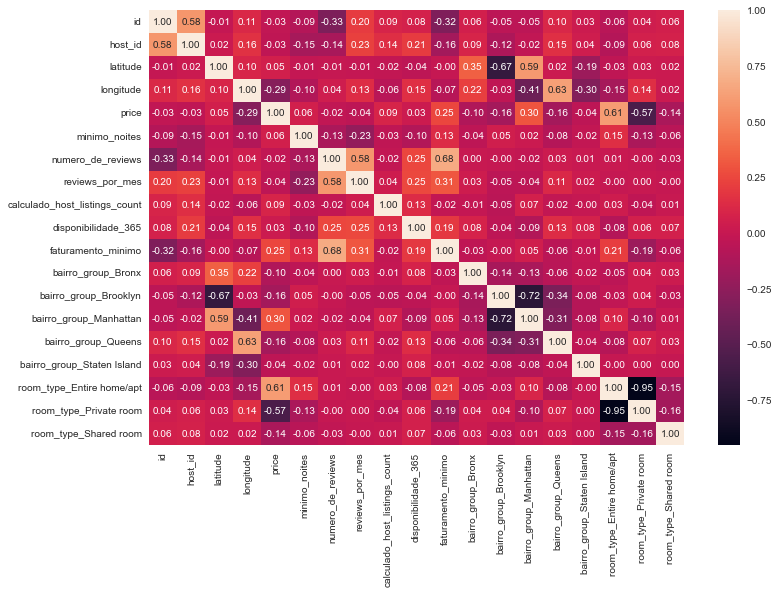

In [68]:
# Criando a matriz de correlação de Pearson (para relações lineares)
pearson_correlation_matrix = df_corr.corr(method='pearson')

# Gerando o mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_correlation_matrix, annot=True, fmt=".2f")
plt.show()

**Nota:** É importante frisar que correlação não implica causalidade. Mesmo que duas variáveis estejam fortemente correlacionadas, isso não significa que uma causa mudanças na outra.

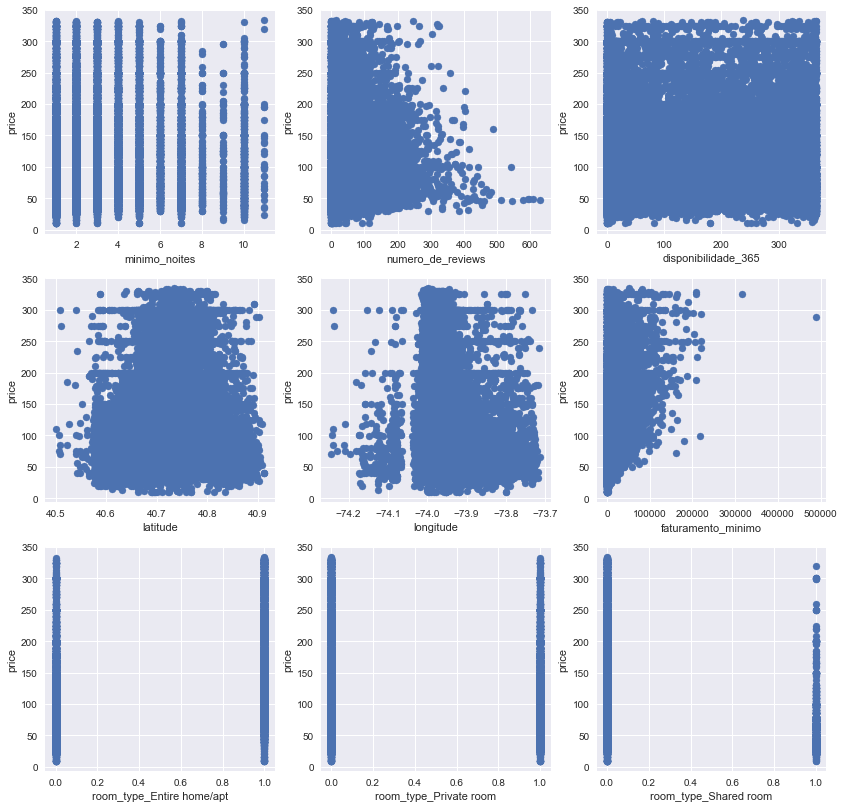

In [75]:
# Criando gráficos de dispersão das variáveis em relação ao preço

plt.figure(figsize=(14, 14))

plt.subplot(3, 3, 1)
plt.scatter(x=df_corr['minimo_noites'], y=df_corr['price'])
plt.xlabel('minimo_noites')
plt.ylabel('price')

plt.subplot(3, 3, 2)
plt.scatter(x=df_corr['numero_de_reviews'], y=df_corr['price'])
plt.xlabel('numero_de_reviews')
plt.ylabel('price')

plt.subplot(3, 3, 3)
plt.scatter(x=df_corr['disponibilidade_365'], y=df_corr['price'])
plt.xlabel('disponibilidade_365')
plt.ylabel('price')

plt.subplot(3, 3, 4)
plt.scatter(x=df_corr['latitude'], y=df_corr['price'])
plt.xlabel('latitude')
plt.ylabel('price')

plt.subplot(3, 3, 5)
plt.scatter(x=df_corr['longitude'], y=df_corr['price'])
plt.xlabel('longitude')
plt.ylabel('price')

plt.subplot(3, 3, 6)
plt.scatter(x=df_corr['faturamento_minimo'], y=df_corr['price'])
plt.xlabel('faturamento_minimo')
plt.ylabel('price')

plt.subplot(3, 3, 7)
plt.scatter(x=df_corr['room_type_Entire home/apt'], y=df_corr['price'])
plt.xlabel('room_type_Entire home/apt')
plt.ylabel('price')

plt.subplot(3, 3, 8)
plt.scatter(x=df_corr['room_type_Private room'], y=df_corr['price'])
plt.xlabel('room_type_Private room')
plt.ylabel('price')

plt.subplot(3, 3, 9)
plt.scatter(x=df_corr['room_type_Shared room'], y=df_corr['price'])
plt.xlabel('room_type_Shared room')
plt.ylabel('price')

plt.show()

### 1.7: Enriquecimento de Dados
- **Dados Externos:** considere incluir dados sobre eventos locais, clima, economia local, etc., que podem influenciar os preços dos aluguéis.
- **Feature Engineering:** crie novas variáveis que possam ser úteis (ex: distância de pontos turísticos, índice de acessibilidade).

## Etapa 2: Implementação do Modelo Preditivo de Precificação

Nessa etapa, serão construídos três modelos preditivos distintos para estimar a variável target "price", com base nas XX variáveis de recurso: "minimo_noites", "numero_de_reiews", "disponibilidade_365", "room_type". Ao final da implementação de cada modelo, será feita uma avaliação de performance para definir qual modelo melhor se adaptou ao objetivo proposto nesse desafio. Os modelos a serem utilizados são:
- Regressão Linear
- Random Forest
- Gradient Boosting

Explique como você faria a previsão do preço a partir dos dados.

- Quais variáveis e/ou suas transformações você utilizou e por quê?
- Qual tipo de problema estamos resolvendo (regressão, classificação)?
- Qual modelo melhor se aproxima dos dados e quais seus prós e contras?
- Qual medida de performance do modelo foi escolhida e por quê?

Supondo um apartamento com as seguintes características.

{'id': 2595,  
'nome': 'Skylit Midtown Castle',  
'host_id': 2845,  
'host_name': 'Jennifer',  
'bairro_group': 'Manhattan',  
'bairro': 'Midtown',  
'latitude': 40.75362,  
'longitude': -73.98377,  
'room_type': 'Entire home/apt',  
'price': 225,  
'minimo_noites': 1,  
'numero_de_reviews': 45,  
'ultima_review': '2019-05-21',  
'reviews_por_mes': 0.38,  
'calculado_host_listings_count': 2,  
'disponibilidade_365': 355}  

**Qual seria a sua sugestão de preço?**

### 2.1 Seleção de Variáveis

### 2.2: Divisão dos Dados
Divida o conjunto de dados em conjuntos de treino e teste.

### 2.3 Escolha do Modelo
- **Modelos Iniciais:** Comece com modelos mais simples como regressão linear, árvores de decisão.
- **Modelos Complexos:** Dependendo dos resultados, considere modelos mais avançados como florestas aleatórias, gradient boosting, ou redes neurais.

### 2.4 Validação Cruzada
Use a validação cruzada para avaliar a generalização do modelo.

### 2.5 Ajuste de Hiperparâmetros
Ajuste os hiperparâmetros do modelo escolhido para melhorar a performance.

### 2.6 Avaliação do Modelo
**Métricas de Avaliação:** Use métricas como RMSE (Root Mean Square Error), MAE (Mean Absolute Error), e R² para avaliar a precisão do modelo.  
**Importância das Variáveis:** Analise quais variáveis são mais importantes na previsão dos preços.

### 2.7 Interpretação dos Resultados
Interprete os resultados do modelo em termos de negócios e ofereça insights para a estratégia de precificação.

### 2.8 Teste e Iteração do Modelo
- Teste o modelo no conjunto de teste.
- Faça iterações para refinar o modelo, se necessário.